In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

from matplotlib.cbook import boxplot_stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=2)
#pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:,.2}'.format(x)
pd.set_option("display.max_rows", 10, "display.max_columns", 10)
pd.options.display.float_format = '{:,.2f}'.format

In [15]:
bangalore_2020 = pd.read_csv('Bangalore_Data_2020.csv')
bangalore_2020.drop_duplicates(inplace=True)

In [16]:
bangalore_past = pd.read_csv('Bangalore_Data_Past.csv')
bangalore_past.drop_duplicates(inplace=True)

In [17]:
bangalore_2020.dtypes

title               object
building_status     object
location            object
price(L)           float64
Price (Rs)           int64
rate_persqft         int64
area_insqft          int64
dtype: object

In [18]:
bangalore_past.dtypes

location                       object
Price/sqft 2018                object
Conversion factor for 2019    float64
Price/sqft 2019                 int64
dtype: object

In [19]:
bangalore_new_2020 = bangalore_2020.drop(['title', 'building_status','price(L)','Price (Rs)','area_insqft'], axis=1)
bangalore_new_2019 = bangalore_past.drop(['Price/sqft 2018','Conversion factor for 2019'], axis=1)

In [20]:
bangalore_new_2020.groupby(by='location').describe().T

location            BTM Layout  Bellandur  Electronic City  HSR Layout  \
rate_persqft count          13         17               31          12   
             mean      1.6e+04    7.1e+03          5.7e+03        7923   
             std       2.6e+04    1.2e+03          1.7e+03     2.5e+03   
             min          3750       4400             2500        5291   
             25%          5925       6400          4.8e+03     6.3e+03   
             50%          7142       7315             5674     7.4e+03   
             75%          9514       8333          6.3e+03        8559   
             max         95145       8403            10224       14484   

location            Hebbal  ...  Koramangala  Marathahalli  Sarjapur  \
rate_persqft count      17  ...           16            16        15   
             mean  8.7e+03  ...      1.2e+04       6.3e+03   5.8e+03   
             std   5.2e+03  ...      3.7e+03       1.5e+03   4.3e+03   
             min      4100  ...         6500          2727      3300   
             25%      6814  ...        1e+04       5.9e+03      3600   
             50%      7792  ...      1.2e+04          6160      4699   
             75%      8403  ...      1.4e+04       7.3e+03   6.1e+03   
             max     27710  ...        21577          9090     20679   

location            Whitefield  Yelahanka  
rate_persqft count          18         18  
             mean         6387    5.6e+03  
             std       1.6e+03      1e+03  
             min          3943       4050  
             25%       5.2e+03       4840  
             50%          6118       5451  
             75%       7.1e+03    6.3e+03  
             max         10438       7552  

[8 rows x 11 columns]

In [21]:
bangalore_new_2019.groupby(by='location').describe().T

location               BTM Layout  Bellandur  Electronic City  HSR Layout  \
Price/sqft 2019 count          37         81              358          57   
                mean      9.6e+03    8.2e+03          6.7e+03     9.6e+03   
                std       3.8e+03      2e+03          1.8e+03     2.8e+03   
                min          4315       4782             2531        5653   
                25%          7027       6694            5e+03        7440   
                50%          8535       7913             6833        8768   
                75%          9964       9217             8014       12212   
                max         20416      16805            13332       16206   

location               Hebbal  ...  Koramangala  Marathahalli  Sarjapur  \
Price/sqft 2019 count     126  ...           72           128        49   
                mean    1e+04  ...      1.4e+04       8.3e+03   5.7e+03   
                std   3.3e+03  ...      4.4e+03       1.7e+03   1.9e+03   
                min      5154  ...         4305          5198      2993   
                25%   7.7e+03  ...      1.1e+04       7.2e+03      5119   
                50%   1.1e+04  ...        12361          7882      5335   
                75%   1.2e+04  ...        17093       9.2e+03      5986   
                max     25542  ...        24887         15472     16411   

location               Whitefield  Yelahanka  
Price/sqft 2019 count         348        167  
                mean      8.2e+03    7.5e+03  
                std       4.1e+03      2e+03  
                min          4375       3656  
                25%       6.3e+03    6.3e+03  
                50%          7959       7313  
                75%       9.3e+03       8421  
                max         72178      19501  

[8 rows x 11 columns]

Electronic City


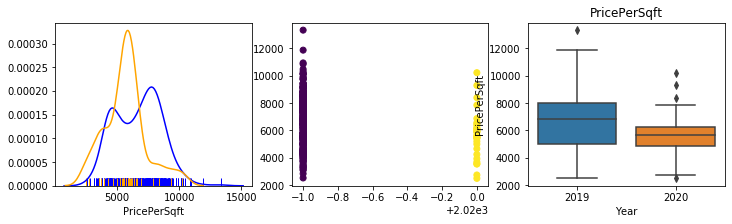

Koramangala


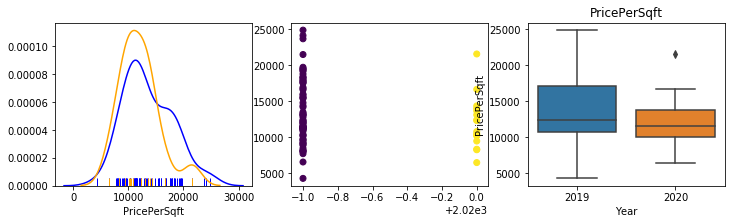

Hebbal


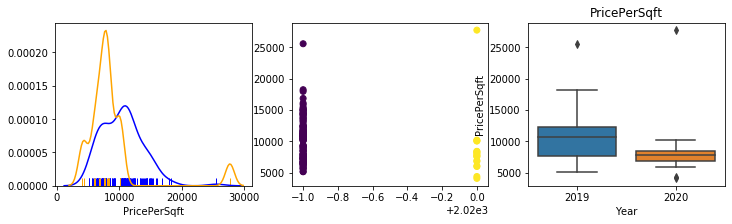

Bellandur


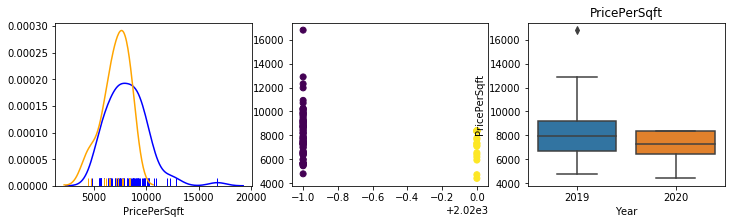

HSR Layout


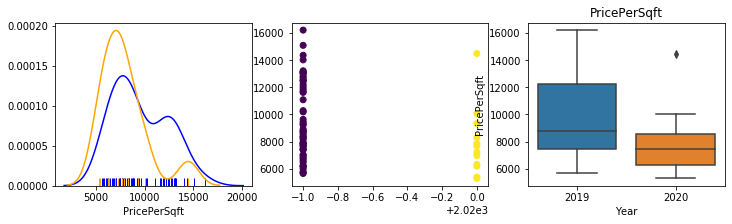

BTM Layout


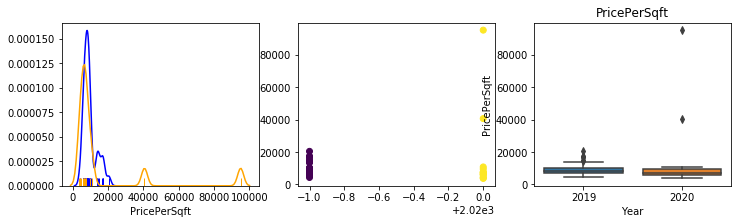

Indira Nagar


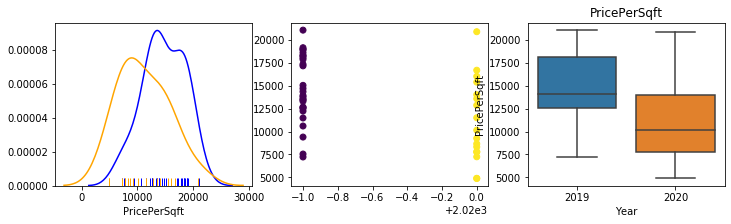

Marathahalli


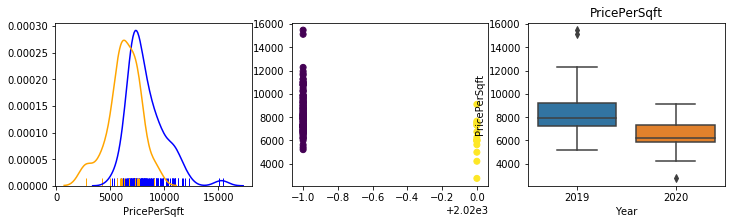

Sarjapur


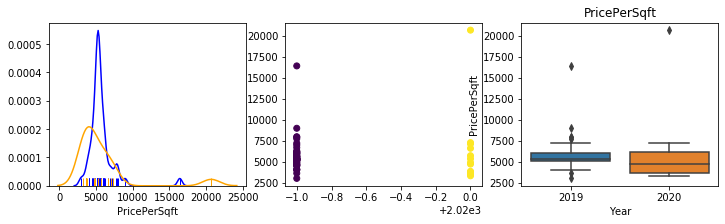

Whitefield


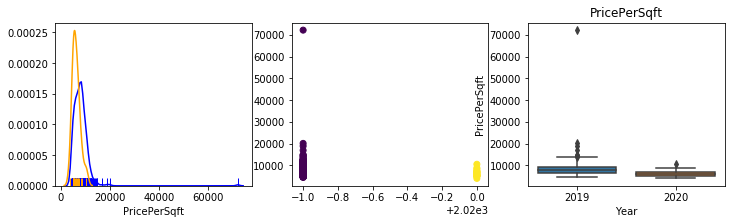

Yelahanka


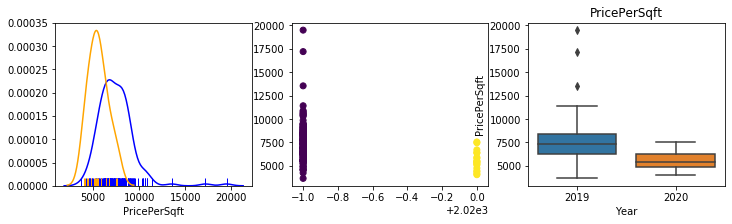

In [22]:
def printPairKdeAndBoxPlot(df, cols, hueVal):
    for col in cols:
        if(col != hueVal):   
            target_0 = df[df[hueVal]==2019]
            target_1 = df[df[hueVal]==2020]
            f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
            sns.distplot(target_0[col], hist=False, rug=True, ax=ax1, color='blue')
            sns.distplot(target_1[col], hist=False, rug=True, ax=ax1, color='orange')
            ax2.scatter(df[hueVal], df[col], c=df[hueVal])
            sns.boxplot(x=hueVal, y=col, data=df, ax=ax3)
            plt.title(col)
            plt.show() 

areas = np.array(bangalore_new_2019['location'].unique())
for area in areas:
    print(area)
    area_2019_data = pd.DataFrame(bangalore_new_2019[bangalore_new_2019['location']==area].reset_index()['Price/sqft 2019'])
    area_2019_data.columns = ['PricePerSqft']
    area_2019_data['Year'] = 2019
    area_2020_data = pd.DataFrame(bangalore_new_2020[bangalore_new_2020['location']==area].reset_index()['rate_persqft'])
    area_2020_data.columns = ['PricePerSqft']
    area_2020_data['Year'] = 2020
    area_data = pd.concat([area_2019_data, area_2020_data])
    printPairKdeAndBoxPlot(area_data, ['PricePerSqft'], 'Year')

In [23]:
from scipy.stats import ttest_ind

for area in areas:
    data_2019 = bangalore_new_2019[bangalore_new_2019['location']==area]['Price/sqft 2019']
    data_2020 = bangalore_new_2020[bangalore_new_2020['location']==area]['rate_persqft']

    #Calculate the T-test and P-Value for TWO INDEPENDENTsamples
    tstat, pval = ttest_ind(data_2019, data_2020) 
    if pval < 0.05:
        if tstat < 0:
            state = 'increased'
        else:
            state = 'decreased'
        print(area, state, ':There is a significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', pval, tstat)
    else:
        print(area, ':There is no significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', pval, tstat)

Electronic City decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.004984622044712644 2.8242293135828005
Koramangala :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.18365234881890147 1.3403793996092348
Hebbal :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.055499833483284564 1.9309184959347485
Bellandur decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.029198017130958893 2.2139704176191795
HSR Layout :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.06476815619415958 1.8777536563078476
BTM Layout :There is no significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.13271343302008135 -1.5294643998919324
Indira Nagar decreased :There is a significant difference between

In [28]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = bangalore_new_2019[bangalore_new_2019['location']==area]['Price/sqft 2019']
    data_2020 = bangalore_new_2020[bangalore_new_2020['location']==area]['rate_persqft']
    area_names.append(area)
    price_2019.append(data_2019.median())
    price_2020.append(data_2020.median())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = ((result['price_2020']-result['price_2019'])/result['price_2019'])*100
result


,Area,price_2019,price_2020,Diff
0,Electronic City,"6,833.00","5,674.00",-16.96
1,Koramangala,"12,361.00","11,574.50",-6.36
2,Hebbal,"10,654.50","7,792.00",-26.87
3,Bellandur,"7,913.00","7,315.00",-7.56
4,HSR Layout,"8,768.00","7,445.50",-15.08
...,...,...,...,...
6,Indira Nagar,"14,126.50","10,144.00",-28.19
7,Marathahalli,"7,882.00","6,160.00",-21.85
8,Sarjapur,"5,335.00","4,699.00",-11.92
9,Whitefield,"7,959.00","6,118.00",-23.13


In [32]:
data = pd.DataFrame()
data['PricePerSqft_2019'] = bangalore_new_2019.groupby('location')['Price/sqft 2019'].median()
data['PricePerSqft_2020'] = bangalore_new_2020.groupby('location')['rate_persqft'].median()

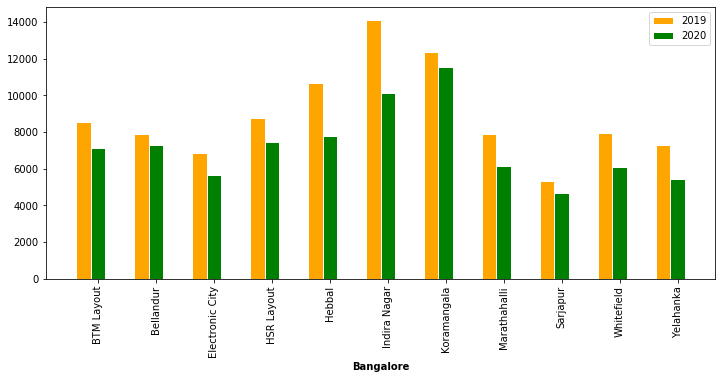

In [35]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = data['PricePerSqft_2019']
bars2 = data['PricePerSqft_2020']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.rcParams["figure.figsize"] = [12,5] 
# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='2019')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='2020')
 
# Add xticks on the middle of the group bars
plt.xlabel('Bangalore', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], data.index, rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.show()